In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
train_data = pd.read_csv("/content/Phising_Training_Dataset.csv")
train_data.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
test_data = pd.read_csv("/content/Phising_Testing_Dataset.csv")
test_data.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [ ]:
train_data.describe()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,...,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,16821.000000,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,...,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,2585.230164,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,...,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,12344.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,14582.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,16821.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,19059.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [ ]:
train_data.shape

(8955, 32)

In [ ]:
train_data.corr()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,1.000000,-0.384460,0.000630,-0.004417,-0.175952,0.000925,-0.005755,0.225424,-0.015549,-0.005449,...,0.012190,-0.033748,0.090454,0.415359,-0.027480,0.073496,-0.012181,0.018435,0.180815,-0.000854
having_IP,-0.384460,1.000000,-0.053184,0.399121,0.162727,0.388331,-0.010055,-0.083055,0.071759,-0.024847,...,0.096831,0.074897,0.010264,-0.059877,0.013970,-0.088005,0.042025,-0.339673,-0.020243,0.094027
URL_Length,0.000630,-0.053184,1.000000,-0.102147,-0.070171,-0.083623,0.053664,-0.004870,0.048650,-0.221207,...,-0.055383,-0.020666,0.197745,-0.046371,0.017214,0.160600,0.000906,-0.023217,-0.076373,0.059331
Shortining_Service,-0.004417,0.399121,-0.102147,1.000000,0.112393,0.841223,-0.088494,-0.033567,-0.061707,0.055415,...,0.038871,0.016820,-0.053322,0.441312,-0.054722,0.027620,0.191166,-0.190125,0.096561,-0.066170
having_At_Symbol,-0.175952,0.162727,-0.070171,0.112393,1.000000,0.091817,-0.011074,-0.056443,0.031472,0.019944,...,0.307084,0.319482,-0.011848,-0.040347,0.035172,-0.048638,0.052266,-0.021183,-0.086436,0.050045
double_slash_redirecting,0.000925,0.388331,-0.083623,0.841223,0.091817,1.000000,-0.093561,-0.032389,-0.036930,0.043198,...,0.058287,0.009779,-0.047033,0.433107,-0.073786,0.009250,0.216002,-0.185197,0.081190,-0.037758
Prefix_Suffix,-0.005755,-0.010055,0.053664,-0.088494,-0.011074,-0.093561,1.000000,0.087054,0.258982,-0.094592,...,-0.012412,-0.035630,0.074091,-0.008066,0.112270,-0.010107,0.059577,0.063379,-0.014781,0.344660
having_Sub_Domain,0.225424,-0.083055,-0.004870,-0.033567,-0.056443,-0.032389,0.087054,1.000000,0.265866,-0.087432,...,-0.026657,0.005246,0.114317,0.132470,-0.001427,0.130962,0.059754,-0.002065,0.086271,0.296728
SSLfinal_State,-0.015549,0.071759,0.048650,-0.061707,0.031472,-0.036930,0.258982,0.265866,1.000000,-0.187539,...,-0.017061,-0.013408,0.170103,0.053233,0.267394,0.070730,0.092084,-0.006427,0.048559,0.712543
Domain_registeration_length,-0.005449,-0.024847,-0.221207,0.055415,0.019944,0.043198,-0.094592,-0.087432,-0.187539,1.000000,...,0.059220,0.011737,-0.075671,-0.017232,-0.140463,-0.050998,-0.035604,0.130958,0.006768,-0.219960


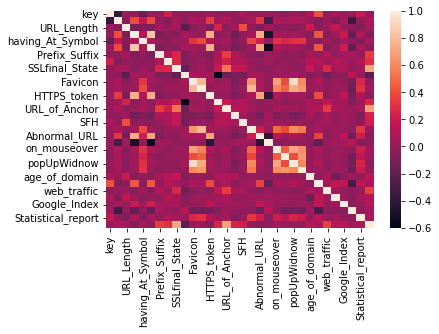

In [ ]:
sns.heatmap(train_data.corr())

In [ ]:
X = train_data.iloc[:,0:31]
X.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [ ]:
y = train_data.iloc[:,31]
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CLASSIFICATION MODELS

**SVM CLASSIFIER**

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5650474595198214


In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'decision_function_shape':['ovo']}

clfcv = svm.SVC()
gridcv = GridSearchCV(clfcv, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.561 total time=   4.6s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.561 total time=   3.7s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.562 total time=   3.6s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.562 total time=   3.6s
[CV 5/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.561 total time=   3.6s
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.561 total time=   3.6s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.561 total time=   3.6s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.562 total time=   3.7s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.562 total time=   3.6s
[CV 5/5] END C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'decision_function_shape': ['ovo'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
from sklearn.metrics import accuracy_score
y_prede1 = gridcv.predict(X_test)
print(accuracy_score(y_test,y_prede1))

0.7989949748743719


K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=413, metric='minkowski', p=2 )  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=413)

In [ ]:
y_predknn = knn.predict(X_test) 
print(accuracy_score(y_test,y_predknn))

0.5656058068118369


Naive Bayes Classifier


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predgnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_predgnb))

0.8883305415968733


 RANDOM FOREST CLASSIFIER WITH GRIDSEARCHCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=35)

In [ ]:
clf_rf.fit(X_train,y_train)
y_predclf = clf_rf.predict(X_test)
print(accuracy_score(y_test,y_predclf))

0.9653824678950307


In [ ]:
parameters = {'max_depth':range(9, 20, 2), 'min_samples_leaf': range(30, 101, 20),'min_samples_split':range(10, 101, 10),'random_state':[0]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=3)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=35),
             param_grid={'max_depth': range(9, 20, 2),
                         'min_samples_leaf': range(30, 101, 20),
                         'min_samples_split': range(10, 101, 10),
                         'random_state': [0]})

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf.score(X_test, y_test)

0.9424902289223898

XGBOOST CLASSIFIER

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_test)
print(accuracy_score(y_test, preds))

0.9525404801786711


XGBOOST CLASSIFIER WITH GRIDSEARCHCV

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_cl = xgb.XGBClassifier()
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [ ]:
best_clf = grid_cv.best_estimator_
best_clf.score(X_test, y_test)

0.9547738693467337

In [ ]:
# Insert the new fixed values to the grid
param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

# Give new value ranges to other params
param_grid["gamma"] = [3, 5, 7]
param_grid["max_depth"] = [9, 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]

In [ ]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="roc_auc", n_jobs=-1)
grid_cv_2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [3, 5, 7],
                         'learning_rate': [0.3, 0.5, 0.7, 1],
                         'max_depth': [9, 15, 20], 'reg_lambda': [10, 30, 50],
                         'scale_pos_weight': [3], 'subsample': [0.8]},
             scoring='roc_auc')

In [ ]:
best_clf = grid_cv_2.best_estimator_
best_clf.score(X_test, y_test)

0.9458403126744835

DEEP LEARNING MODEL

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
def build_and_compile_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.Dense(512, activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.Dense(256, activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.Dense(256, activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.Dense(512, activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.Dense(256, activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.Dense(2,activation='sigmoid',kernel_initializer='he_normal')
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.Poisson(),metrics=['accuracy'])
  return model

In [ ]:
dnn_model = build_and_compile_model()

In [ ]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4min, sys: 14.8 s, total: 4min 15s
Wall time: 3min 22s


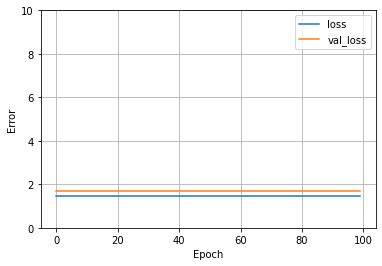

In [ ]:
plot_loss(history)

In [ ]:
loss, acc = dnn_model.evaluate(X_test,y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.565


WORKING ON TEST DATASET

In [ ]:
testres = clf_rf.predict(test_data)

In [ ]:
testres = testres.T
testres

array([ 1, -1, -1, ..., -1,  1,  1])

In [ ]:
testres = pd.DataFrame(testres, columns = ['Result'])
testres

,Result
0,1
1,-1
2,-1
3,-1
4,1
...,...
2095,1
2096,1
2097,-1
2098,1


In [ ]:
testres.value_counts()

Result
 1        1135
-1         965
dtype: int64

In [ ]:
res = test_data.iloc[:,0:1]
res

,key
0,21338
1,21339
2,21340
3,21341
4,21342
...,...
2095,23433
2096,23434
2097,23435
2098,23436


In [ ]:
df_out = pd.merge(res,testres['Result'],how = 'left',left_index = True, right_index = True)
df_out

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,1


In [ ]:
df_out.to_csv('submissions.csv', index=False)